In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import networkx as nx
from itertools import combinations
from IPython.display import clear_output

# Densities not multi-graph

## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [3]:
# DONT need cummed also, will cummulatively make graphs by year and get quantites

df = pk.load(open('pickles_and_munged_csv/pre1950_cated_codes_as_ints_v1.pk', 'rb')); df

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,IE,IS,IT,JP,LU,NL,NO,SE,SU,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1513, 1789], [1268, 1855], [1762, 1821], [24..."
1837,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5834, 5836], [4907, 5440], [799, 5648], [602..."
1838,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1537, 1774], [1154, 1208], [2724, 2748], [40..."
1839,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4212, 4231], [5078, 6180], [4915, 5001], [33..."
1840,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[2722, 2748], [1862, 1862], [1161, 5985], [48..."
1841,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5986, 6001], [3027, 5586], [2964, 3002], [18..."
1842,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4897, 5004], [5740, 5803], [5349, 5421], [11..."
1843,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1762, 1821], [1762, 1821], [5704, 5807], [57..."
1844,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[3764, 3825], [1520, 1764], [4641, 4643], [11..."


In [4]:
df.drop('SU', axis=1, inplace=True)

In [5]:
df_nds_lnks = df[df.CH == None]; df_nds_lnks

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
pub_year,,,,,,,,,,,,,,,,,,,,,


In [25]:
df_nds_lnks = df[df.CH == None]

for col in df:
    print col
    g = nx.Graph()
    for inx in df.index:
        print inx,
        for ls in df.loc[inx,col]:
            g.add_edges_from(combinations(ls, 2))
        df_nds_lnks.loc[inx,col] = [nx.number_of_nodes(g), nx.number_of_edges(g)]
    clear_output()

In [24]:
df_nds_lnks_test = df[df.CH == None]

for col in ['US']:
    print col
    g = nx.Graph()
    for inx in [1836]:
        print inx,
        for ls in df.loc[inx,col]:
            for combo in combinations(ls, 2):
                print combo
            g.add_edges_from(combinations(ls, 2))
        print g.edges()
        df_nds_lnks_test.loc[inx,col] = [nx.number_of_nodes(g), nx.number_of_edges(g)]
    #clear_output()

US
1836 (1513, 1789)
(1268, 1855)
(1762, 1821)
(2437, 2551)
(5781, 5834)
(655, 4930)
(655, 4930)
[(1762, 1821), (2437, 2551), (1513, 1789), (5834, 5781), (4930, 655), (1268, 1855)]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
df_nds_lnks

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[12, 6]"
1837,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[52, 29]"
1838,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[103, 58]"
1839,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[144, 81]"
1840,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[193, 111]"
1841,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[239, 154]"
1842,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[274, 180]"
1843,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[307, 206]"
1844,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[343, 232]"


In [26]:
pk.dump(df_nds_lnks, open('pickles_and_munged_csv/pre1950_nums_nds_lnks_uniqueOnly.pk', 'wb'))

# Plotting

In [17]:

cntrs_ord_node_2010 = df_nds_lnks.loc[2010].map(lambda x: x[0]).sort_values(ascending=False).index.values
cncnc = df_nds_lnks.loc[2010].map(lambda x: x[0]).sort_values(ascending=False); cncnc
cntrs_ord_node_2010

array(['US', 'JP', 'DE', 'FR', 'GB', 'CH', 'ES', 'IT', 'CA', 'AT', 'AU',
       'NL', 'SE', 'FI', 'BE', 'NO', 'DK', 'GR', 'LU', 'IE', 'IS'], dtype=object)

## Nodes

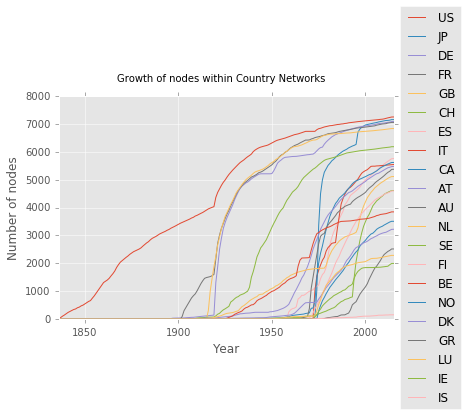

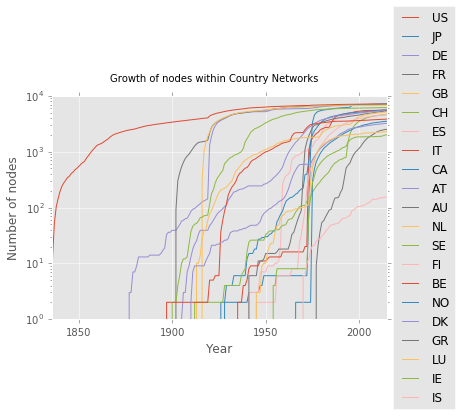

In [27]:
# snippet for plotting in order
for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(lambda x: x[0])[col].plot()
ax = plt.gca()
plt.ylabel('Number of nodes')
plt.xlabel('Year')
plt.suptitle('Growth of nodes within Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_yscale('log')

plt.figure()
for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(lambda x: x[0])[col].plot() 
ax = plt.gca()
plt.ylabel('Number of nodes')
plt.xlabel('Year')
plt.suptitle('Growth of nodes within Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale('log')

## Links

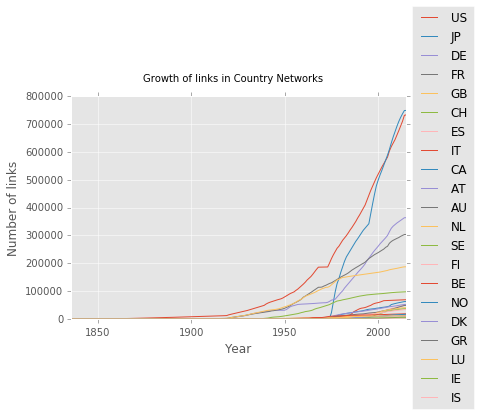

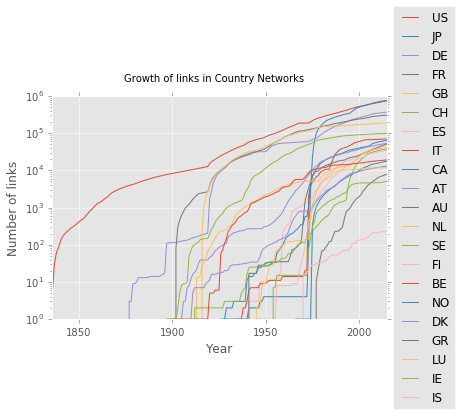

In [30]:
for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(lambda x: x[1])[col].plot()
ax = plt.gca()
plt.ylabel('Number of links')
plt.xlabel('Year')
plt.suptitle('Growth of links in Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_yscale('log')

plt.figure()
for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(lambda x: x[1])[col].plot()
ax = plt.gca()
plt.ylabel('Number of links')
plt.xlabel('Year')
plt.suptitle('Growth of links in Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale('log')

## Densities

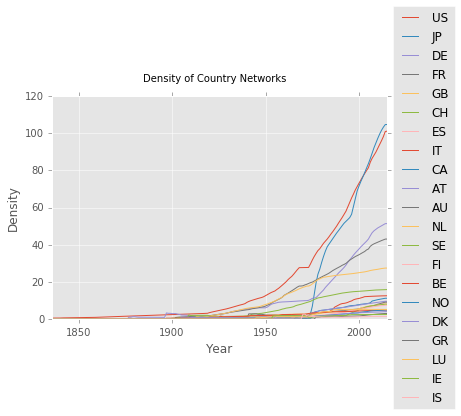

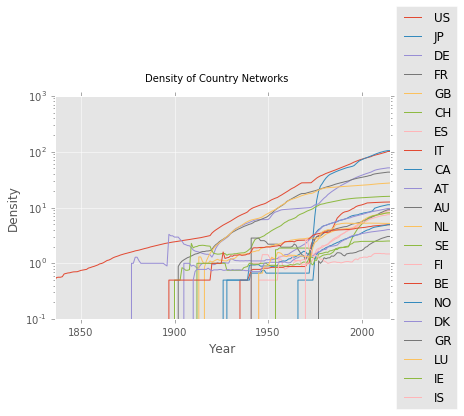

In [31]:
def get_density(nds_lnks):
    if nds_lnks[0] == 0:
        return 0
    return (nds_lnks[1]/float(nds_lnks[0]))

for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(get_density)[col].plot()
ax = plt.gca()
#ax.set_yscale('log')
plt.ylabel('Density')
plt.xlabel('Year')
plt.suptitle('Density of Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure()
for col in cntrs_ord_node_2010:
    df_nds_lnks.applymap(get_density)[col].plot()
ax = plt.gca()
ax.set_yscale('log')
plt.ylabel('Density')
plt.xlabel('Year')
plt.suptitle('Density of Country Networks')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))